In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred = model.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[57,  1],
       [21,  1]], dtype=int64)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test  = sc_x.fit_transform(x_test)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[52,  6],
       [ 3, 19]], dtype=int64)

## Visualising the train set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


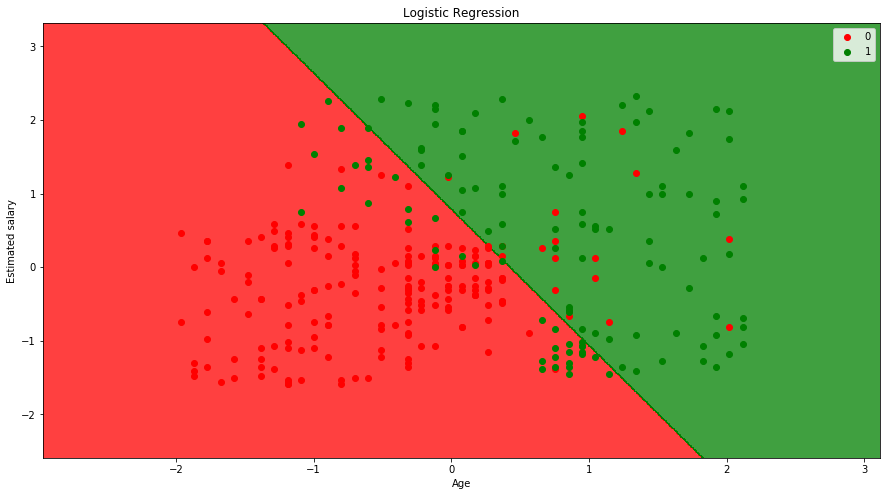

In [12]:
plt.figure(figsize=(15,8))
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step=.01),
                   np.arange(start=x_set[:,1].min() -1, stop=x_set[:,1].max()+1, step=.01))
plt.contourf(x1,x2,model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

## Visualising the test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


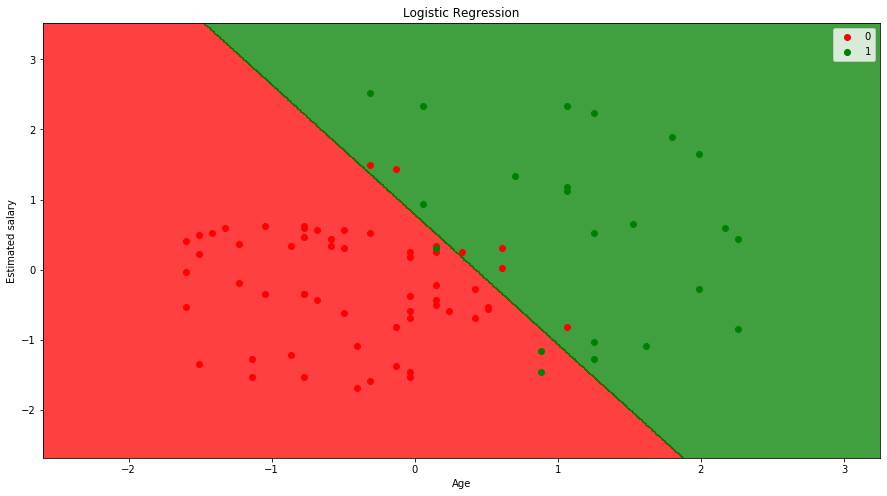

In [13]:
plt.figure(figsize=(15,8))
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step=.01),
                   np.arange(start=x_set[:,1].min() -1, stop=x_set[:,1].max()+1, step=.01))
plt.contourf(x1,x2,model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()